In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCACapacity.csv")
MCACapacity

,technology,dst_region,region,agent,sector,type,year,capacity
0,gasboiler,Kenya,Kenya,A1,residential,retrofit,2020,10.0000
1,Biomass Power Plant,Kenya,Kenya,A1,power,retrofit,2020,2.7864
2,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2020,12.9722
3,Large Hydropower Plant (Dam) (>100MW),Kenya,Kenya,A1,power,retrofit,2020,15.4490
4,Light Fuel Oil Power Plant,Kenya,Kenya,A1,power,retrofit,2020,8.9010
...,...,...,...,...,...,...,...,...
93,Oil Fired Gas Turbine (SCGT),Kenya,Kenya,A1,power,retrofit,2050,7.3547
94,Onshore Wind,Kenya,Kenya,A1,power,retrofit,2050,5.1006
95,Solar PV (Distributed with Storage),Kenya,Kenya,A1,power,retrofit,2050,0.6226
96,Solar PV (Utility),Kenya,Kenya,A1,power,retrofit,2050,0.3949


In [78]:
MCACapacity_summed = MCACapacity.groupby(["technology", "sector", "year", "agent"]).sum().reset_index()
MCACapacity_summed

,technology,sector,year,agent,capacity
0,Biomass Power Plant,power,2020,A1,2.7864
1,Biomass Power Plant,power,2025,A1,2.5078
2,Biomass Power Plant,power,2030,A1,2.2570
3,Biomass Power Plant,power,2035,A1,2.0313
4,Biomass Power Plant,power,2040,A1,1.8282
...,...,...,...,...,...
79,gasboiler,residential,2030,A1,6.4000
80,gasboiler,residential,2035,A1,5.1200
81,gasboiler,residential,2040,A1,4.0920
82,gasboiler,residential,2045,A1,3.2700


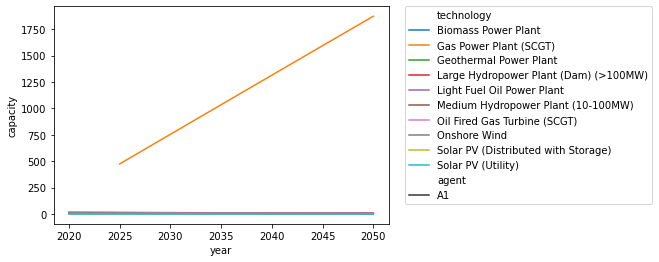

In [79]:
sns.lineplot(data=MCACapacity_summed[(MCACapacity_summed.sector=="power")], x="year", y="capacity", hue="technology", style="agent")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

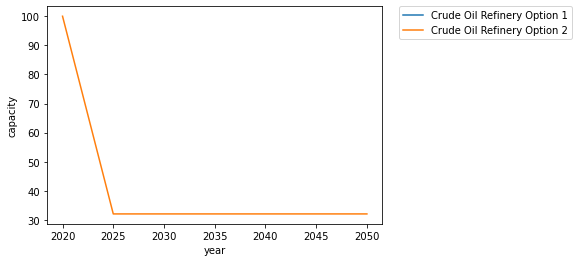

In [80]:
sns.lineplot(data=MCACapacity_summed[MCACapacity_summed.sector=="oil"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

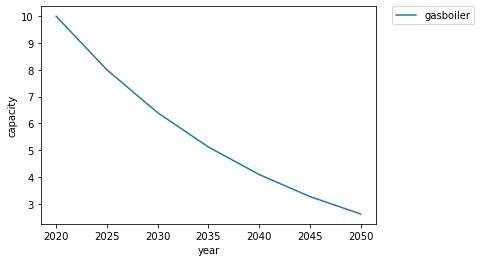

In [81]:
sns.lineplot(data=MCACapacity_summed[MCACapacity_summed.sector=="residential"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)